In [18]:
import pandas as pd 
import pandas_datareader as web
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

%matplotlib inline
plt.style.use('seaborn')

In [19]:
df = web.DataReader('BBRI.JK',data_source='yahoo', start='2012-01-01', end='2021-02-17')

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,1370.0,1350.0,1360.0,1360.0,15835000.0,1026.955078
2012-01-03,1390.0,1360.0,1380.0,1380.0,81980000.0,1042.057495
2012-01-04,1390.0,1370.0,1390.0,1390.0,151180000.0,1049.608521
2012-01-05,1400.0,1370.0,1390.0,1390.0,134337500.0,1049.608521
2012-01-06,1400.0,1370.0,1380.0,1380.0,105145000.0,1042.057495


In [20]:
print(df.shape)

(2272, 6)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2272 entries, 2012-01-02 to 2021-02-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2272 non-null   float64
 1   Low        2272 non-null   float64
 2   Open       2272 non-null   float64
 3   Close      2272 non-null   float64
 4   Volume     2272 non-null   float64
 5   Adj Close  2272 non-null   float64
dtypes: float64(6)
memory usage: 124.2 KB


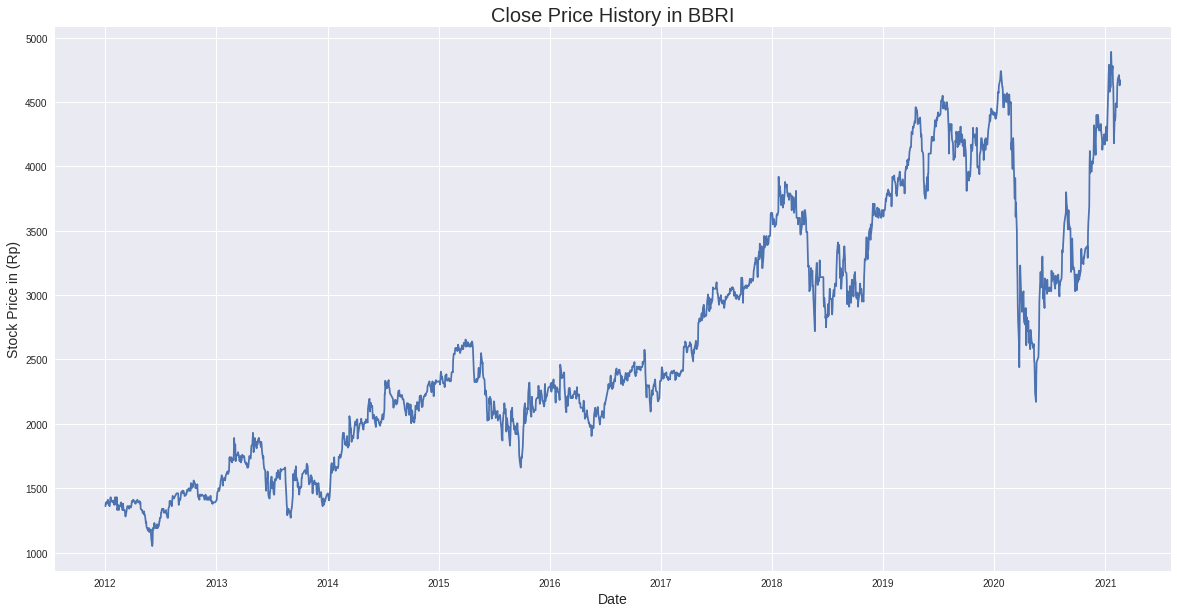

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(df['Close'])
plt.title('Close Price History in BBRI', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in (Rp)', fontsize=14)
plt.show()

In [23]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,1370.0,1350.0,1360.0,1360.0,15835000.0,1026.955078
2012-01-03,1390.0,1360.0,1380.0,1380.0,81980000.0,1042.057495
2012-01-04,1390.0,1370.0,1390.0,1390.0,151180000.0,1049.608521
2012-01-05,1400.0,1370.0,1390.0,1390.0,134337500.0,1049.608521
2012-01-06,1400.0,1370.0,1380.0,1380.0,105145000.0,1042.057495


In [24]:
df_close = df.filter(['Close'])
df_close_values = df_close.values
df_close_values

array([[1360.],
       [1380.],
       [1390.],
       ...,
       [4670.],
       [4630.],
       [4670.]])

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_close_values)
scaled_data = scaled_data.flatten()

In [26]:
X_train, X_test = train_test_split(scaled_data, test_size=0.2)

In [27]:
X_train

array([0.27864583, 0.88541667, 0.3984375 , ..., 0.74479167, 0.28515625,
       0.82552083])

In [28]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [29]:
train_set = windowed_dataset(X_train, window_size=60, batch_size=100, shuffle_buffer=1000)

In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.LSTM(60, return_sequences=True),
                                    tf.keras.layers.LSTM(60),
                                    tf.keras.layers.Dense(30, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(1)])

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=['mae'])
history = model.fit(train_set, epochs=50, verbose=1)

Epoch 1/50
18/18 [==============================] - 5s 91ms/step - loss: 0.1044 - mae: 0.3838
Epoch 2/50
18/18 [==============================] - 2s 90ms/step - loss: 0.0962 - mae: 0.3619
Epoch 3/50
18/18 [==============================] - 2s 89ms/step - loss: 0.0874 - mae: 0.3382
Epoch 4/50
18/18 [==============================] - 2s 91ms/step - loss: 0.0797 - mae: 0.3175
Epoch 5/50
18/18 [==============================] - 2s 90ms/step - loss: 0.0729 - mae: 0.3008
Epoch 6/50
18/18 [==============================] - 2s 93ms/step - loss: 0.0671 - mae: 0.2866
Epoch 7/50
18/18 [==============================] - 2s 90ms/step - loss: 0.0621 - mae: 0.2746
Epoch 8/50
18/18 [==============================] - 2s 91ms/step - loss: 0.0578 - mae: 0.2640
Epoch 9/50
18/18 [==============================] - 2s 93ms/step - loss: 0.0541 - mae: 0.2547
Epoch 10/50
18/18 [==============================] - 2s 91ms/step - loss: 0.0509 - mae: 0.2467
Epoch 11/50
18/18 [==============================] - 2s 93m